In [ ]:
'''

@Author: Vighnesh Harish Bilgi
@Date: 2022-11-02
@Last Modified by: Vighnesh Harish Bilgi
@Last Modified time: 2022-11-02
@Title : AWS BOTO3 programs

'''

In [13]:
import pandas as pd
import boto3
from io import StringIO,BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tempfile
import json

In [3]:
import os
os.environ['AWS_DEFAULT_REGION'] = 'ap-south-1'
os.environ['AWS_ACCESS_KEY_ID'] = os.environ.get('test1_access_key')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.environ.get('test1_secret_access_key')

### 1.Uploading different file formats to S3 Bucket.

#### 1.1. Upload CSV File to AWS S3

In [18]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    df = pd.read_csv('sampleFiles/iris-dataset.csv')

    client.upload_file(Filename = 'sampleFiles/iris-dataset.csv',Bucket = 'transfer-to-s3', Key = 'iris-dataset.csv')

if __name__ == "__main__":
    main()

#### 1.2. Upload TXT File to AWS S3

In [19]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource('s3')
    # client = boto3.client("s3")
    return s3

def main():

    s3 = connect_to_s3()

    # client.upload_file(Filename = 'sampleFiles/sampleText.txt',Bucket = 'transfer-to-s3', Key = 'sampleText.txt')
    s3.Bucket('transfer-to-s3').upload_file(Filename = 'sampleFiles/sampleText.txt', Key = 'sampleText.txt')

if __name__ == "__main__":
    main()

#### 1.3. Upload JSON File to AWS S3

In [20]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    df = pd.read_json('sampleFiles/sampleJSON.json')

    client.upload_file(Filename = 'sampleFiles/sampleJSON.json',Bucket = 'transfer-to-s3', Key = 'sampleJSON.json')

if __name__ == "__main__":
    main()

#### 1.4. Upload PNG File to AWS S3

In [21]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    client.upload_file(Filename = 'sampleFiles/aws.png',Bucket = 'transfer-to-s3', Key = 'aws.png')

if __name__ == "__main__":
    main()

### 2. Load and Download Files from AWS S3 Bucket

#### 2.1. Load and Download CSV file from AWS S3 bucket

In [23]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    # obj = s3.Bucket('transfer-to-s3').Object('sampleCSV2.csv').get()
    obj = client.get_object(Bucket='transfer-to-s3', Key='sampleCSV2.csv')

    df = pd.read_csv(obj['Body'], index_col=0)
    print(df.head(5))

    # s3.Bucket('transfer-to-s3').download_file(Key = 'sampleCSV2.csv', Filename = 'sampleFiles/sampleCSV2.csv')
    client.download_file('transfer-to-s3', 'sampleCSV2.csv', 'sampleFiles/sampleCSV2.csv')

if __name__ == "__main__":
    main()

     Industry_aggregation_NZSIOC Industry_code_NZSIOC Industry_name_NZSIOC  \
Year                                                                         
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   

                   Units Variable_code  \
Year                                     
2021  Dollars (millions)           H01   
2021  Dollars (millions)           H04   
2021  Dollars (millions)           H05   
2021  Dollars (millions)           H07   
2021  Dollars (millions)           H08   

                                        Variable_name      Variable_category  \
Year                                                                          

#### 2.2. Load and Download TXT file from AWS S3 bucket

In [24]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    obj = client.get_object(Bucket='transfer-to-s3', Key='sampleText2.txt')

    text_file = obj['Body'].read().decode(encoding="utf-8",errors="ignore")
    print(text_file)

    client.download_file('transfer-to-s3', 'sampleText2.txt', 'sampleFiles/sampleText2.txt')

if __name__ == "__main__":
    main()

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3,1.4,0.1,Iris-setosa
4.3,3,1.1,0.1,Iris-setosa
5.8,4,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5,3,1.6,0.2,Iris-setosa
5,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.

#### 2.3. Load and Download JSON file from AWS S3 bucket

In [25]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    obj = client.get_object(Bucket='transfer-to-s3', Key='sampleJSON2.json')

    df = pd.read_json(obj['Body'])
    print(df.head(5))

    client.download_file('transfer-to-s3', 'sampleJSON2.json', 'sampleFiles/sampleJSON2.json')

if __name__ == "__main__":
    main()

                             name    type  \
0  com.miguno.avro.twitter_schema  record   
1  com.miguno.avro.twitter_schema  record   
2  com.miguno.avro.twitter_schema  record   

                                              fields  
0  {'name': 'username', 'type': 'string', 'doc': ...  
1  {'name': 'tweet', 'type': 'string', 'doc': 'Th...  
2  {'name': 'timestamp', 'type': 'long', 'doc': '...  


#### 2.4. Load and Download PNG file from AWS S3 bucket

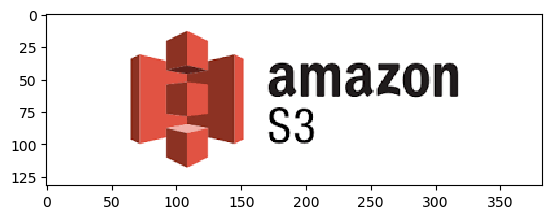

In [69]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource('s3')
    # client = boto3.client("s3")
    return s3

def main():

    s3 = connect_to_s3()

    bucket = s3.Bucket('transfer-to-s3')
    obj = bucket.Object('s3.png')

    tmp = tempfile.NamedTemporaryFile()

    with open(tmp.name, 'wb') as f:

        obj.download_fileobj(f)
    
    img=mpimg.imread(tmp.name)    
    imgplot = plt.imshow(img)
    plt.show(imgplot)
    s3.Bucket('transfer-to-s3').download_file('s3.png','sampleFiles/s3.png')


if __name__ == "__main__":
    main()

### 3. Upload large file to AWS S3 Bucket

In [22]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    df = pd.read_csv('sampleFiles/iris-dataset.csv')

    #s3.Bucket('transfer-to-s3').upload_file(Filename = 'sampleFiles/ubuntu-20.04.iso', Key = 'ubuntu-20.04.iso')
    client.upload_file(Filename = 'sampleFiles/ubuntu-20.04.iso',Bucket = 'transfer-to-s3', Key = 'ubuntu-20.04.iso')

if __name__ == "__main__":
    main()

### 4. CRUD operation on CSV, TXT, JSON and PNG


Reading each file from bucket : crud-bucket-demo
s3.ObjectSummary(bucket_name='crud-bucket-demo', key='1_2eBdh0vLZjUyCDF6x1EqvQ.png')
s3.ObjectSummary(bucket_name='crud-bucket-demo', key='address_book_csv.csv')
s3.ObjectSummary(bucket_name='crud-bucket-demo', key='crud.png')
s3.ObjectSummary(bucket_name='crud-bucket-demo', key='sampleJSON.json')
s3.ObjectSummary(bucket_name='crud-bucket-demo', key='sampleText.txt')
Adding MobileNumber column in csv file
           Lastname       City        State     Zip      Address  \
Firstname                                                          
Vighnesh      Bilgi       Pune  Maharashtra  411019  HDFC Colony   
Anoop      Aparajit     Nagpur  Maharashtra  440036      Jaitala   
Carl           Pais  Bengaluru    Bengaluru  671326   Whitefield   

                       Email  MobileNumber  
Firstname                                   
Vighnesh   vhbilgi@gmail.com    9012783465  
Anoop           aa@yahoo.com    9763214580  
Carl             cvp

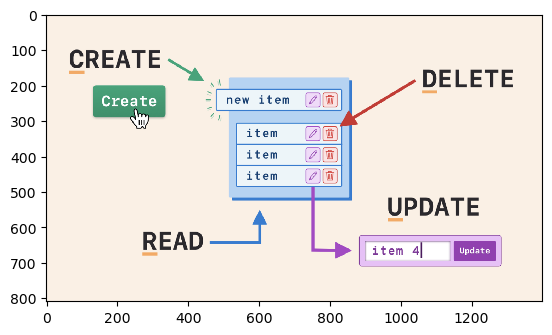

Reading each file from bucket : crud-bucket-demo
Printing all bucket names to verify if - crud-bucket-demo is deleted:
mumbai-bucket-demo
transfer-to-s3


In [43]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service through an IAM user.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource(service_name = 's3')
    return s3

def upload_to_bucket(path,s3):
    """

    Description:
        Create a csv out of a dataframe by taking file path of csv file (i.e. string 'path') and uploading it to AWS S3 bucket.
    Parameter:
        string path,
        ServiceResource s3
    Return:
        No values returned.
    """

    file_key = path.split('/')[1]
    s3.Bucket('crud-bucket-demo').upload_file(Filename = path, Key = file_key)

def create_bucket(s3):
    """

    Description:
       Creating Bucket 'crud-bucket-demo' after connecting to s3 service.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    s3.create_bucket(Bucket = 'crud-bucket-demo',  CreateBucketConfiguration={'LocationConstraint': 'ap-south-1'})
    print("Printing all bucket names to verify if - crud-bucket-demo is created:")
    for bucket in s3.buckets.all():
        print(bucket.name)

def read_bucket(s3):
    """

    Description:
       Reading all files in the bucket.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    my_bucket = s3.Bucket('crud-bucket-demo')
    for my_bucket_object in my_bucket.objects.all():
        print(my_bucket_object)

def update_csv(obj,new_col,s3):
    """

    Description:
       Updating the csv file after loading from the bucket.
    Parameter:
        S3BucketObject obj,
        list new_col,
        ServiceResource s3
    Return:
        Pandas Dataframe address_book_df
    """
    csv_buffer = StringIO()
    address_book_df = pd.read_csv(obj['Body'], index_col=0)
    address_book_df['MobileNumber'] =  new_col
    address_book_df.to_csv(csv_buffer, index= False)
    s3.Object('crud-bucket-demo', 'address_book_csv.csv').put(Body=csv_buffer.getvalue())

    return address_book_df

def update_text(obj,new_lines,s3):
    """

    Description:
       Updating the text file after loading from the bucket.
    Parameter:
        S3BucketObject obj,
        string new_lines,
        ServiceResource s3
    Return:
        No values returned.
    """
    obj.put(Body=new_lines)

    return obj

def update_json(obj,new_contact,s3):
    """

    Description:
        Updating the json file after loading from the bucket.
    Parameter:
        S3BucketObject obj,
        dict new_contact,
        ServiceResource s3
    Return:
        No values returned.
    """
    json_data=obj['Body'].read().decode()

    json_file= json.loads(json_data)
    json_file['people'].append(new_contact)
    json_obj = json.dumps(json_file).encode()
    s3.Object('crud-bucket-demo', 'sampleJSON.json').put(Body=json_obj)

    return json_file

def update_png(obj,s3):
    """

    Description:
        Updating the png file after loading from the bucket.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """
    # png_buffer = StringIO()
    s3.Object('crud-bucket-demo','crud.png').copy_from(CopySource='crud-bucket-demo/1_2eBdh0vLZjUyCDF6x1EqvQ.png')
    s3.Object('crud-bucket-demo','1_2eBdh0vLZjUyCDF6x1EqvQ.png').delete()

    bucket = s3.Bucket('crud-bucket-demo')
    obj = bucket.Object('crud.png')

    tmp = tempfile.NamedTemporaryFile()

    with open(tmp.name, 'wb') as f:

        obj.download_fileobj(f)
    
    img=mpimg.imread(tmp.name)    
    imgplot = plt.imshow(img)
    plt.show(imgplot)
    # s3.Object('crud-bucket-demo', 'address_book_csv.csv').put(Body=csv_buffer.getvalue())

def delete_bucket(s3):
    """

    Description:
       Deleting bucket objects and then the bucket itself.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """
    s3.Bucket('crud-bucket-demo').objects.all().delete()
    print('Reading each file from bucket : crud-bucket-demo')

    my_bucket = s3.Bucket('crud-bucket-demo')
    for my_bucket_object in my_bucket.objects.all():
        print(my_bucket_object)

    # Delete bucket
    s3.Bucket('crud-bucket-demo').delete()
    print("Printing all bucket names to verify if - crud-bucket-demo is deleted:")
    for bucket in s3.buckets.all():
        print(bucket.name)


def main():

    s3 = connect_to_s3()

    # CRUD operations

    # 1. C : CREATE
    # 1a. Create Bucket
    # create_bucket(s3)

    # 1b. Reading csv , txt, json and png files and loading them to the bucket

    path = 'sampleFiles/address_book_csv.csv'
    upload_to_bucket(path,s3)

    path = 'sampleFiles/sampleText.txt'
    upload_to_bucket(path,s3)

    path = 'sampleFiles/sampleJSON.json'
    upload_to_bucket(path,s3)

    path = 'sampleFiles/1_2eBdh0vLZjUyCDF6x1EqvQ.png'
    upload_to_bucket(path,s3)

    # 2. R : READ
    print('\nReading each file from bucket : crud-bucket-demo')
    read_bucket(s3)

    # 3. U : UPDATE

    # Updating csv file and loading them to bucket
    print("Adding MobileNumber column in csv file")
    obj = s3.Bucket('crud-bucket-demo').Object('address_book_csv.csv').get()
    mobNo = [9012783465,9763214580,8192037465]
    new_df = update_csv(obj,mobNo,s3)
    print(new_df)

    # Replacing text file and loading them to bucket
    print("Replacing lines in text file")
    obj = s3.Bucket('crud-bucket-demo').Object('sampleText.txt')
    new_lines = '''As a young industry that champions innovation and rates its practitioners based on their ability to apprehend 
    (sorry, “grok”) the continual emergence of new technologies,frameworks, protocols and data models, we are not particularly 
    familiar with tradition. However, the practice of arranging type for optimal pleasure and comfort is a centuries-old discipline.'''
    new_obj = update_text(obj,new_lines,s3)
    text_file = new_obj.get()['Body'].read().decode(encoding="utf-8",errors="ignore")
    print(text_file)

    # Updating json file and loading them to bucket
    print("Adding new contact in json file")
    obj = s3.Bucket('crud-bucket-demo').Object('sampleJSON.json').get()
    new_contact = { "firstName": "Vighnesh",
       "lastName": "Bilgi",
       "gender": "male",
       "age": 27,
       "number": "9049480396"
       }
    new_df = update_json(obj,new_contact,s3)
    print(new_df)

    # Updating png file and loading them to bucket
    print("Changing name of png file")
    obj = s3.Bucket('crud-bucket-demo').Object('1_2eBdh0vLZjUyCDF6x1EqvQ.png').get()
    update_png(obj,s3)

    # 4. D : DELETE
    # DELETE Bucket
    # Remove all files/objects under bucket and deleting bucket

    delete_bucket(s3)


if __name__ == "__main__":
    main()

### 5. Create EC2 instances

#### 5.1. Create EC2 instance on Amazon Linux AMI

In [13]:
def connect_to_ec2_client():
    """

    Description:
        To connect to AWS EC2 service.
    Parameter:
        No parameters
    Return:
        ServiceResource ec2
    """
    ec2_client = boto3.client("ec2")
    return ec2_client

def connect_to_ec2_resource():
    """

    Description:
        To connect to AWS EC2 service.
    Parameter:
        No parameters
    Return:
        ServiceResource ec2
    """
    ec2_resource = boto3.resource("ec2")
    return ec2_resource

def main():

    ec2_client = connect_to_ec2_client()

    # print(ec2_client.describe_instances())

    # Create Key pair
    kp = ec2_client.create_key_pair(KeyName = 'demo-keypair')
    print(kp)
    print(kp['KeyMaterial'])

    file = open('demo-keypair.pem','w')
    file.write(kp['KeyMaterial'])
    file.close()

    # Create Security Group
    for k in ec2_client.describe_security_groups():
        print(k, ec2_client.describe_security_groups()[k])

    sec_group = ec2_client.create_security_group(

        GroupName = 'demo-keypair',
        Description = 'demo-keypair sg',
        VpcId = 'vpc-001007bd2573bdfad'
    )

    print(sec_group)

    gid = 'sg-036c850a304135a6b' #sec_group['GroupId'] #'sg-036c850a304135a6b'

    ec2_client.authorize_security_group_ingress(
        GroupId = 'sg-036c850a304135a6b',
        IpPermissions = [
            {
                'IpProtocol': 'tcp', 
                'FromPort': 80,
                'ToPort' : 80,
                'IpRanges' : [{'CidrIp': '0.0.0.0/0'}]
            },
            {
                'IpProtocol': 'tcp', 
                'FromPort': 22,
                'ToPort' : 22,
                'IpRanges' : [{'CidrIp': '0.0.0.0/0'}]
            }
        ]        
    )

    ec2_resource = connect_to_ec2_resource()

    instances = ec2_resource.create_instances(
        ImageId = 'ami-0e6329e222e662a52',
        MinCount = 1,
        MaxCount = 1,
        InstanceType = 't2.micro',
        KeyName = 'demo-keypair',
        BlockDeviceMappings = [
            {
                'DeviceName' : "/dev/xvda",
                'Ebs': {
                        'DeleteOnTermination': True,
                        'VolumeSize': 20
                }
            }

        ],
        SecurityGroups = ['demo-keypair']
    )

    #Stop Instance
    ec2_client.stop_instances(InstanceIds = ['i-0bee9fbbf2c9214ca'])
    #Start Instance
    ec2_client.start_instances(InstanceIds = ['i-0bee9fbbf2c9214ca'])
    #Termintate Instance
    ec2_client.termintate_instances(InstanceIds = ['i-0bee9fbbf2c9214ca'])

if __name__ == "__main__":
    main()

#### 5.2. Create EC2 instance on Windows AMI

In [12]:
def connect_to_ec2_client():
    """

    Description:
        To connect to AWS EC2 service.
    Parameter:
        No parameters
    Return:
        ServiceResource ec2
    """
    ec2_client = boto3.client("ec2")
    return ec2_client

def connect_to_ec2_resource():
    """

    Description:
        To connect to AWS EC2 service.
    Parameter:
        No parameters
    Return:
        ServiceResource ec2
    """
    ec2_resource = boto3.resource("ec2")
    return ec2_resource

def main():

    ec2_client = connect_to_ec2_client()

    print(ec2_client.describe_instances())

    # Create Key pair
    kp = ec2_client.create_key_pair(KeyName = 'demo-win-keypair')
    print(kp)
    print(kp['KeyMaterial'])

    file = open('demo-win-keypair.pem','w')
    file.write(kp['KeyMaterial'])
    file.close()

    #Create Security Group
    for k in ec2_client.describe_security_groups():
        print(k, ec2_client.describe_security_groups()[k])

    sec_group = ec2_client.create_security_group(

        GroupName = 'demo-win-keypair',
        Description = 'demo-win-keypair sg',
        VpcId = 'vpc-001007bd2573bdfad'
    )

    print(sec_group)

    gid = sec_group['GroupId']

    ec2_client.authorize_security_group_ingress(
        GroupId = gid,
        IpPermissions = [
            {
                'IpProtocol': 'tcp', 
                'FromPort': 80,
                'ToPort' : 80,
                'IpRanges' : [{'CidrIp': '0.0.0.0/0'}]
            },
            {
                'IpProtocol': 'tcp', 
                'FromPort': 22,
                'ToPort' : 22,
                'IpRanges' : [{'CidrIp': '0.0.0.0/0'}]
            }
        ]        
    )

    ec2_resource = connect_to_ec2_resource()

    instances = ec2_resource.create_instances(
        ImageId = 'ami-072b0ca48713abe5a',
        MinCount = 1,
        MaxCount = 1,
        InstanceType = 't2.micro',
        KeyName = 'demo-win-keypair',
        BlockDeviceMappings = [
            {
                'DeviceName' : "/dev/xvda",
                'Ebs': {
                        'DeleteOnTermination': True,
                        'VolumeSize': 20
                }
            }

        ],
        SecurityGroups = ['demo-win-keypair']
    )

    # #Stop Instance
    ec2_client.stop_instances(InstanceIds = ['i-06557bb207e74eb32'])
    #Start Instance
    ec2_client.start_instances(InstanceIds = ['i-06557bb207e74eb32'])
    #Termintate Instance
    ec2_client.termintate_instances(InstanceIds = ['i-06557bb207e74eb32'])

if __name__ == "__main__":
    main()

#### 5.3. Create EC2 instance on Ubuntu AMI 

In [15]:
def connect_to_ec2_client():
    """

    Description:
        To connect to AWS EC2 service.
    Parameter:
        No parameters
    Return:
        ServiceResource ec2
    """
    ec2_client = boto3.client("ec2")
    return ec2_client

def connect_to_ec2_resource():
    """

    Description:
        To connect to AWS EC2 service.
    Parameter:
        No parameters
    Return:
        ServiceResource ec2
    """
    ec2_resource = boto3.resource("ec2")
    return ec2_resource

def main():

    ec2_client = connect_to_ec2_client()

    # print(ec2_client.describe_instances())

    #Create Key pair
    kp = ec2_client.create_key_pair(KeyName = 'demo-ubuntu-keypair')
    # print(kp)
    # print(kp['KeyMaterial'])

    file = open('demo-ubuntu-keypair.pem','w')
    file.write(kp['KeyMaterial'])
    file.close()

    #Create Security Group
    # for k in ec2_client.describe_security_groups():
    #     print(k, ec2_client.describe_security_groups()[k])

    sec_group = ec2_client.create_security_group(

        GroupName = 'demo-ubuntu-keypair',
        Description = 'demo-ubuntu-keypair sg',
        VpcId = 'vpc-001007bd2573bdfad'
    )

    # print(sec_group)

    gid = sec_group['GroupId']

    ec2_client.authorize_security_group_ingress(
        GroupId = gid,
        IpPermissions = [
            {
                'IpProtocol': 'tcp', 
                'FromPort': 80,
                'ToPort' : 80,
                'IpRanges' : [{'CidrIp': '0.0.0.0/0'}]
            },
            {
                'IpProtocol': 'tcp', 
                'FromPort': 22,
                'ToPort' : 22,
                'IpRanges' : [{'CidrIp': '0.0.0.0/0'}]
            }
        ]        
    )

    ec2_resource = connect_to_ec2_resource()

    instances = ec2_resource.create_instances(
        ImageId = 'ami-024c319d5d14b463e',
        MinCount = 1,
        MaxCount = 1,
        InstanceType = 't2.micro',
        KeyName = 'demo-win-keypair',
        BlockDeviceMappings = [
            {
                'DeviceName' : "/dev/xvda",
                'Ebs': {
                        'DeleteOnTermination': True,
                        'VolumeSize': 20
                }
            }

        ],
        SecurityGroups = ['demo-win-keypair']
    )

    # #Stop Instance
    ec2_client.stop_instances(InstanceIds = ['i-0b32831d1d0cc5716'])
    #Start Instance
    ec2_client.start_instances(InstanceIds = ['i-0b32831d1d0cc5716'])
    #Termintate Instance
    ec2_client.termintate_instances(InstanceIds = ['i-0b32831d1d0cc5716'])

if __name__ == "__main__":
    main()

#### 6.1 Create bucket versioning 1.

In [67]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource('s3')
    # client = boto3.client("s3")
    return s3

def connect_to_s3_client():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    client = boto3.client("s3")
    return client

def create_bucket(s3):
    """

    Description:
       Creating Bucket 'boto3-bucket-versioning' after connecting to s3 service.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    s3.create_bucket(Bucket = 'boto3-bucket-versioning',  CreateBucketConfiguration={'LocationConstraint': 'ap-south-1'})
    print("Printing all bucket names to verify if - boto3-bucket-versioning is created:")
    for bucket in s3.buckets.all():
        print(bucket.name)

def enable_version(s3):
    """

    Description:
       Enabling versioning for Bucket 'boto3-bucket-versioning' after connecting to s3 service.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    versioning = s3.BucketVersioning('boto3-bucket-versioning')
    versioning.enable()
    print(versioning.status)

def retrieve_versions(client,s3):
    """

    Description:
       Retrieving mutiple versions from Bucket 'boto3-bucket-versioning'.
    Parameter:
        ServiceResource client,
        ServiceResource s3
    Return:
        No values returned
    """

    versions = client.list_object_versions(Bucket='boto3-bucket-versioning')


    for version in versions["Versions"]:
        version_id = version['VersionId']

        file_key = version['Key']

        response = client.get_object(
            Bucket='boto3-bucket-versioning',
            Key=file_key,
            VersionId=version_id,
        )
        data = response['Body'].read()
        print(data)
 

def main():

    s3 = connect_to_s3()
    client = connect_to_s3_client()
    create_bucket(s3)
    enable_version(s3)
    
    s3.Bucket('boto3-bucket-versioning').upload_file(Filename = 'sampleFiles/sampleHTML.html', Key = 'sampleHTML.html')
    s3.Bucket('boto3-bucket-versioning').upload_file(Filename = 'updatedFiles/sampleHTML.html', Key = 'sampleHTML.html')
    
    retrieve_versions(client,s3)


if __name__ == "__main__":
    main()

b'<html>\n<h1>Hello World!</h1>\n<p>This is a new paragraph!</p>\n</html>\n'
b'<html>\n<h1>Hello World!</h1>\n</html>\n'


#### 6.2 Create bucket versioning 2.

In [68]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource('s3')
    # client = boto3.client("s3")
    return s3

def connect_to_s3_client():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    client = boto3.client("s3")
    return client

def create_bucket(s3):
    """

    Description:
       Creating Bucket 'boto3-bucket-versioning2' after connecting to s3 service.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    s3.create_bucket(Bucket = 'boto3-bucket-versioning2',  CreateBucketConfiguration={'LocationConstraint': 'ap-south-1'})
    print("Printing all bucket names to verify if - boto3-bucket-versioning2 is created:")
    for bucket in s3.buckets.all():
        print(bucket.name)

def enable_version(s3):
    """

    Description:
       Enabling versioning for Bucket 'boto3-bucket-versioning2' after connecting to s3 service.
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    versioning = s3.BucketVersioning('boto3-bucket-versioning2')
    versioning.enable()
    print(versioning.status)

def retrieve_versions(client,s3):
    """

    Description:
       Retrieving mutiple versions from Bucket 'boto3-bucket-versioning2'.
    Parameter:
        ServiceResource client,
        ServiceResource s3
    Return:
        No values returned
    """

    versions = client.list_object_versions(Bucket='boto3-bucket-versioning2')


    for version in versions["Versions"]:
        version_id = version['VersionId']

        file_key = version['Key']

        response = client.get_object(
            Bucket='boto3-bucket-versioning2',
            Key=file_key,
            VersionId=version_id,
        )
        data = response['Body'].read()
        print(data)
 

def main():

    s3 = connect_to_s3()
    client = connect_to_s3_client()
    create_bucket(s3)
    enable_version(s3)
    
    s3.Bucket('boto3-bucket-versioning2').upload_file(Filename = 'sampleFiles/sampleText.txt', Key = 'sampleText.txt')
    s3.Bucket('boto3-bucket-versioning2').upload_file(Filename = 'updatedFiles/sampleText.txt', Key = 'sampleText.txt')
    
    retrieve_versions(client,s3)


if __name__ == "__main__":
    main()

b'As a young industry that champions innovation and rates its practitioners based on their ability to apprehend \n    (sorry, \xe2\x80\x9cgrok\xe2\x80\x9d) the continual emergence of new technologies,frameworks, protocols and data models, we are not particularly \n    familiar with tradition. However, the practice of arranging type for optimal pleasure and comfort is a centuries-old discipline.'
b'What Is The Perfect Paragraph? #\n\nAs designers, we are frequently and incorrectly reminded that our job is to \xe2\x80\x9cmake things pretty.\xe2\x80\x9d \nWe are indeed designers \xe2\x80\x94 not artists \xe2\x80\x94 and there is no place for formalism in good design. \nWeb design has a function, and that function is to communicate the message for which the Web page was conceived. The medium is not the message.\n\nNever is this principle more pertinent than when dealing with type, the bread and butter of Web-borne communication. \nA well-set paragraph of text is not supposed to wow the rea